SyntaxError: invalid syntax (<ipython-input-37-9258b7dd0f09>, line 1)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
data = pd.read_csv('auto-mpg.csv')
data.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cyl,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displ,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
accel,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
yr,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


In [5]:
data.shape

(392, 9)

In [6]:
data.drop('name', axis = 1, inplace = True)

In [7]:
data['origin'] = data['origin'].replace({1: 'america', 2: 'asia', 3: ' europe'})

In [8]:
data

,mpg,cyl,displ,hp,weight,accel,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,america
388,44.0,4,97.0,52,2130,24.6,82,asia
389,32.0,4,135.0,84,2295,11.6,82,america
390,28.0,4,120.0,79,2625,18.6,82,america


In [9]:
ddata = pd.get_dummies( data,  columns = ['origin'])
ddata

,mpg,cyl,displ,hp,weight,accel,yr,origin_ europe,origin_america,origin_asia
0,18.0,8,307.0,130,3504,12.0,70,0,1,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,0,1,0
388,44.0,4,97.0,52,2130,24.6,82,0,0,1
389,32.0,4,135.0,84,2295,11.6,82,0,1,0
390,28.0,4,120.0,79,2625,18.6,82,0,1,0


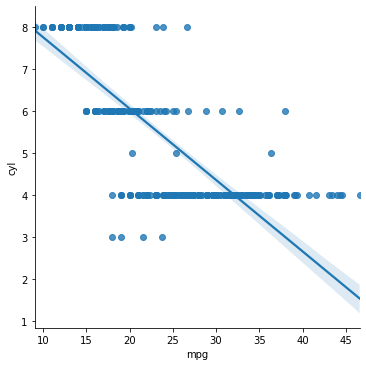

In [10]:
sns.lmplot(x= 'mpg', y= 'cyl', data = ddata)


In [11]:
ddata['mpg'].corr(ddata['cyl'])

-0.7776175081260216

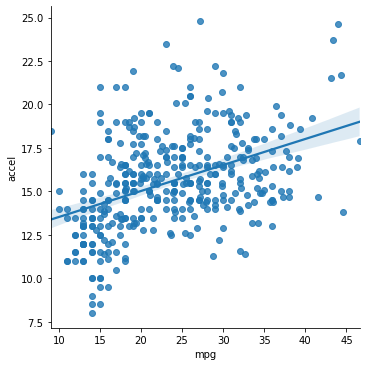

In [12]:
sns.lmplot(x = 'mpg', y = 'accel', data = ddata)

In [13]:
ddata['mpg'].corr(ddata['accel'])

0.4233285369027875

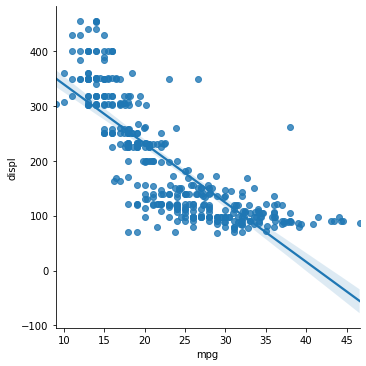

In [14]:
sns.lmplot(x = 'mpg', y = 'displ' , data = ddata)

In [15]:
ddata['mpg'].corr(ddata['displ'])

-0.8051269467104577

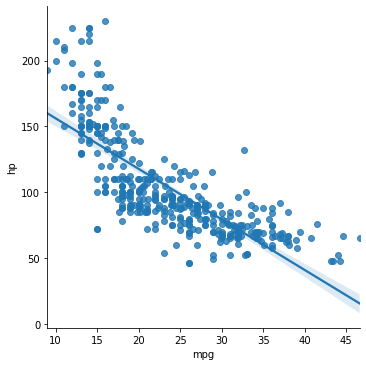

In [16]:
sns.lmplot(x = 'mpg', y = 'hp', data = ddata)

In [17]:
ddata['mpg'].corr(ddata['hp'])

-0.7784267838977759

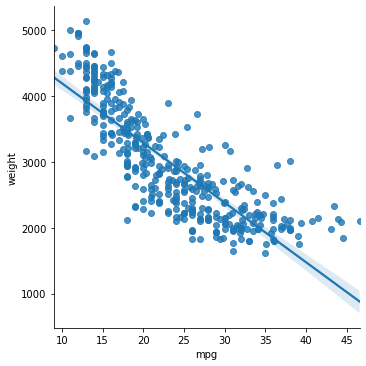

In [18]:
sns.lmplot(x = 'mpg', y = 'weight', data = ddata)

In [19]:
ddata['mpg'].corr(ddata['weight'])

-0.8322442148315753

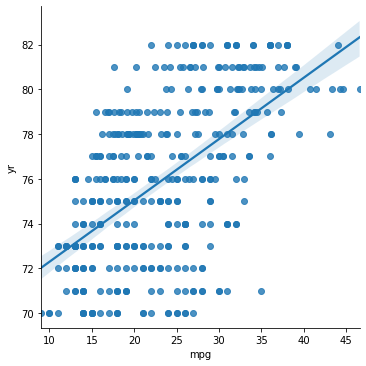

In [20]:
sns.lmplot(x ='mpg', y = 'yr', data = ddata)

In [21]:
ddata['mpg'].corr(ddata['yr'])

0.5805409660907856

In [22]:
data.columns

Index(['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr', 'origin'], dtype='object')

In [23]:
ddata.isna().sum()

mpg               0
cyl               0
displ             0
hp                0
weight            0
accel             0
yr                0
origin_ europe    0
origin_america    0
origin_asia       0
dtype: int64

In [24]:
ddata.dtypes
#dhp = pd.DataFrame(ddata.hp.isdigit())
#ddata[dhp['hp']== False]
#ddata = ddata.replace('?', np.nan)

mpg               float64
cyl                 int64
displ             float64
hp                  int64
weight              int64
accel             float64
yr                  int64
origin_ europe      uint8
origin_america      uint8
origin_asia         uint8
dtype: object

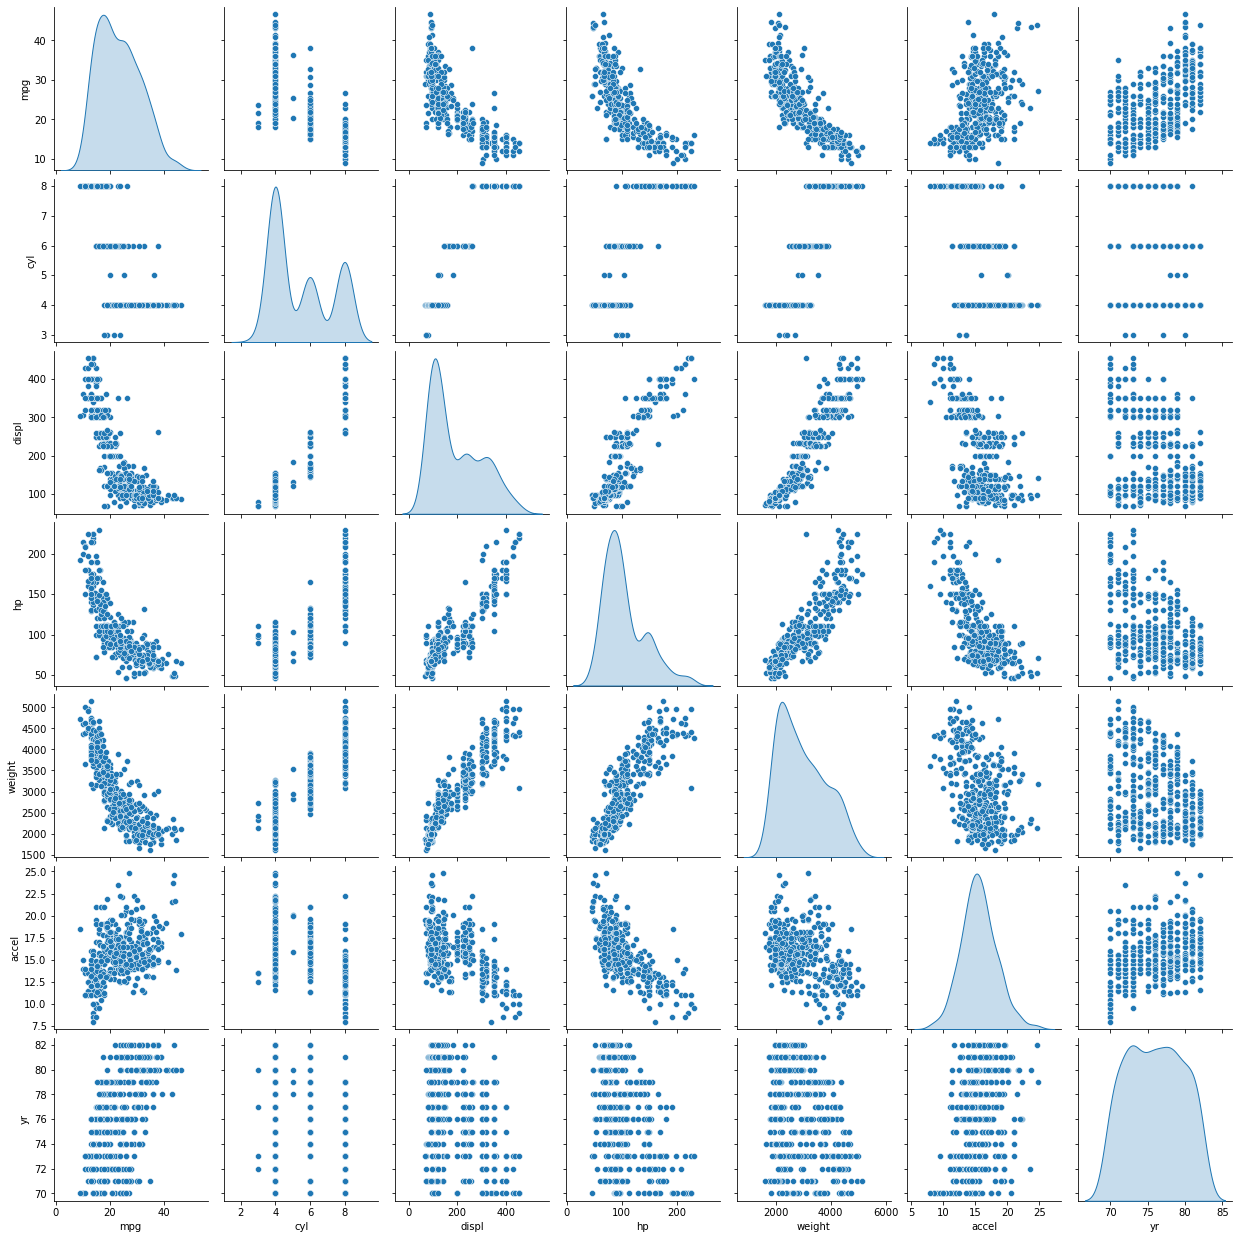

In [25]:
sel = ddata.iloc[:, 0:7]
sns.pairplot(sel, diag_kind = 'kde')

In [26]:
X = ddata.drop('mpg', axis = 1)

y = ddata[['mpg']]

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 1)

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
coef = model.coef_
coef

array([[-2.32509254e-01,  2.45825956e-02, -1.48890324e-03,
        -7.61188242e-03,  2.80132661e-01,  7.74684971e-01,
         9.47250347e-01, -1.77314559e+00,  8.25895242e-01]])

In [29]:
intercept = model.intercept_
print('The intercept is {}'.format(intercept))

The intercept is [-19.75089112]


In [30]:
for index, col_name in enumerate(X_train.columns):
    print('The coefficient of {} is {}'.format(col_name, coef[index]))

The coefficient of cyl is [-2.32509254e-01  2.45825956e-02 -1.48890324e-03 -7.61188242e-03
  2.80132661e-01  7.74684971e-01  9.47250347e-01 -1.77314559e+00
  8.25895242e-01]


IndexError: index 1 is out of bounds for axis 0 with size 1

In [31]:
Y = model.predict(X_test)
Y

array([[23.83567423],
       [28.59726492],
       [32.37736248],
       [22.01588437],
       [35.28019321],
       [28.14163774],
       [26.55945716],
       [12.57219984],
       [25.63744107],
       [32.0953011 ],
       [23.40186073],
       [32.21377673],
       [20.20455071],
       [31.80347979],
       [29.52579591],
       [14.74734514],
       [29.86523971],
       [33.12612966],
       [11.05583483],
       [23.03764967],
       [27.03713766],
       [17.98215689],
       [17.970493  ],
       [16.10744901],
       [10.85311295],
       [20.09330878],
       [31.84106862],
       [18.50652465],
       [21.76656008],
       [28.94836323],
       [21.95017154],
       [24.40318225],
       [10.27943191],
       [28.67974388],
       [20.91743998],
       [14.33883247],
       [17.08346441],
       [21.499123  ],
       [35.17239049],
       [24.59637251],
       [16.31300567],
       [11.94917488],
       [22.42178229],
       [22.36191917],
       [22.15963237],
       [18

In [32]:
model.score(X_test,y_test)

0.8242172817490031

In [33]:
y_test.shape

(118, 1)

In [34]:
C = X_test['cyl']
C

81     4
165    4
351    4
119    4
379    4
      ..
59     4
12     8
303    4
163    8
91     8
Name: cyl, Length: 118, dtype: int64

ValueError: continuous is not supported